# Gradient of Image

## import library

In [672]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors

## load input image ('test.jpeg')

In [673]:
I0 = img.imread('test.jpeg')

## check the size of the input image

In [674]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
num_row     = len(I0[0,:,0])
num_column  = len(I0[:,0,0])
num_channel = len(I0[0,0,:])
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I0 = ', num_row)
print('number of columns of I0 = ', num_column)
print('number of channels of I0 = ', num_channel)

number of rows of I0 =  512
number of columns of I0 =  510
number of channels of I0 =  3


## convert the color image into a grey image
- take the average of the input image with 3 channels with respect to the channels into an image with 1 channel

In [675]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

R, G, B = I0[:,:,0], I0[:,:,1], I0[:,:,2]
I = (R/3.0 + G/3.0 + B/3.0)

num_row     = len(I[0,:])
num_column  = len(I[:,0])
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I = ', num_row)
print('number of columns of I = ', num_column)

number of rows of I =  512
number of columns of I =  510


## normalize the converted image
- normalize the converted grey scale image so that its maximum value is 1 and its minimum value is 0

In [676]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

# I = (I - np.min(I)/np.sqrt(np.sum(I**2)))/256
I = I / 255
# I = (I - np.min(I)/np.ptp(I))

# I = (I - np.min(I)/np.max(I) - np.min(I))/256


#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('maximum value of I = ', np.max(I))
print('minimum value of I = ', np.min(I))

maximum value of I =  0.9986928104575165
minimum value of I =  0.0


## define a function to compute the derivative of input matrix in x(row)-direction

- forward difference : $ I[x+1, y] - I[x, y] $ 

In [677]:
def compute_derivative_x_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    forward = np.roll(I, -1, axis=0)
    forward[-1,:] = forward[-2,:]
    # print(forward)
    D = forward - I
    # print(I)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D
# compute_derivative_x_forward(I)

- backward difference : $ I[x, y] - I[x-1, y] $ 

In [678]:
def compute_derivative_x_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    backward = np.roll(I, 1, axis=0)
    backward[0,:] = backward[1,:]
    # print(forward)
    D = backward - I
    # print(I)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D
# compute_derivative_x_backward(I)

- central difference : $ \frac{1}{2} \left( I[x+1, y] - I[x-1, y] \right)$ 

In [679]:
def compute_derivative_x_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    # an = I[-1,:].reshape(-1,1)
    # forward = np.concatenate((I[1:,:],an.T),axis=0)

    # ab = I[0,:].reshape(-1,1)
    # backward = np.concatenate((ab.T,I[:-1,:]),axis=0)
    # D = (forward - backward) / 2

    D = (compute_derivative_x_backward(I) - compute_derivative_x_forward(I))/2

    # print(I)
    # print(forward)
    # print(D)
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D
# compute_derivative_x_central(I)

## define a function to compute the derivative of input matrix in y(column)-direction

- forward difference : $ I[x, y+1] - I[x, y] $ 

In [680]:
def compute_derivative_y_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    forward = np.roll(I, -1, axis=1)
    forward[:,-1] = forward[:,-2]
    # print(forward)
    D = forward - I
    # print(I)
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D
# compute_derivative_y_forward(I)

- backward difference : $ I[x, y] - I[x, y-1] $ 

In [681]:
def compute_derivative_y_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    an = I[:,0].reshape(-1,1)
    backward = np.concatenate((an,I[:,:-1]),axis=1)
    D = I - backward

    forward = np.roll(I, 1, axis=1)
    forward[:,0] = forward[:,1]
    # print(forward)
    D = forward - I
    # print(I)
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D
# compute_derivative_y_backward(I)

- central difference : $ \frac{1}{2} \left( I[x, y+1] - I[x, y-1] \right)$ 

In [682]:
def compute_derivative_y_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    
    # an = I[:,-1].reshape(1,-1)
    # forward = np.concatenate((I[:,1:],an.T),axis=1)

    # an = I[:,0].reshape(1,-1)
    # backward = np.concatenate((an.T,I[:,:-1]),axis=1)

    # D = forward - backward
    D = (compute_derivative_y_backward(I) - compute_derivative_y_forward(I))/2

    # print(I)
    # print(forward)
    # print(backward)
    # print(D)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D
# compute_derivative_y_central(I)

## compute the norm of the gradient of the input image 

- $L_2^2$-norm of the gradient $ \left( \frac{\partial I}{\partial x}, \frac{\partial I}{\partial y} \right) $ is defined by $ \left( \frac{\partial I}{\partial x} \right)^2 + \left( \frac{\partial I}{\partial y} \right)^2 $

In [683]:
def compute_norm_gradient_central(I):
    
    norm_gradient = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    dx = compute_derivative_x_central(I)
    dy = compute_derivative_y_central(I)

    norm_gradient = (np.square(dx) + np.square(dy))
   
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return norm_gradient
    

___

___

## functions for presenting the results

___

___

In [684]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I0)
    plt.show()

In [685]:
def function_result_02():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I, cmap='gray', vmin=0, vmax=1, interpolation='none')
    plt.show()

In [686]:
def function_result_03():

    D = compute_derivative_x_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [687]:
def function_result_04():

    D = compute_derivative_x_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [688]:
def function_result_05():

    D = compute_derivative_x_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [689]:
def function_result_06():

    D = compute_derivative_y_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [690]:
def function_result_07():

    D = compute_derivative_y_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [691]:
def function_result_08():

    D = compute_derivative_y_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [692]:
def function_result_09():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [693]:
def function_result_10():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    im = plt.imshow(D, cmap=cm.jet, norm=colors.LogNorm())
    plt.colorbar(im)
    plt.show()

In [694]:
def function_result_11():

    D = compute_derivative_x_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [695]:
def function_result_12():

    D = compute_derivative_x_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [696]:
def function_result_13():

    D = compute_derivative_x_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [697]:
def function_result_14():

    D = compute_derivative_y_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [698]:
def function_result_15():

    D = compute_derivative_y_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [699]:
def function_result_16():

    D = compute_derivative_y_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [700]:
def function_result_17():

    D = compute_norm_gradient_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


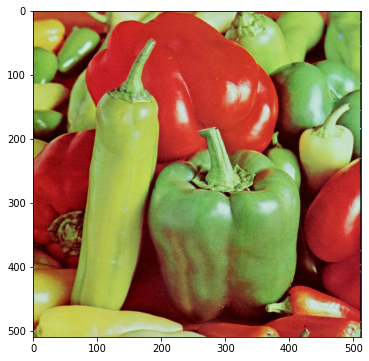

**************************************************
## [RESULT 02]
**************************************************


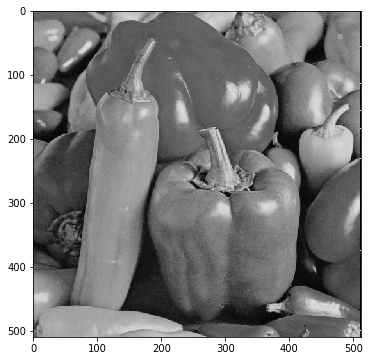

**************************************************
## [RESULT 03]
**************************************************


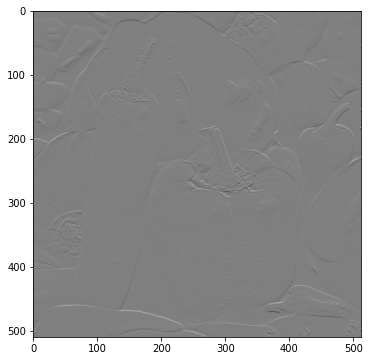

**************************************************
## [RESULT 04]
**************************************************


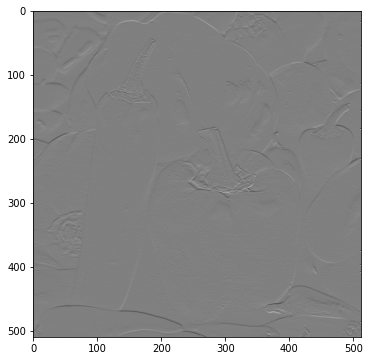

**************************************************
## [RESULT 05]
**************************************************


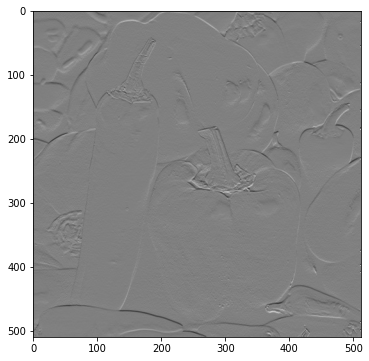

**************************************************
## [RESULT 06]
**************************************************


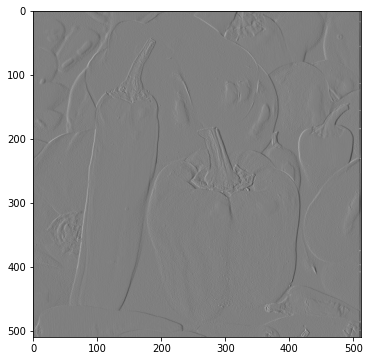

**************************************************
## [RESULT 07]
**************************************************


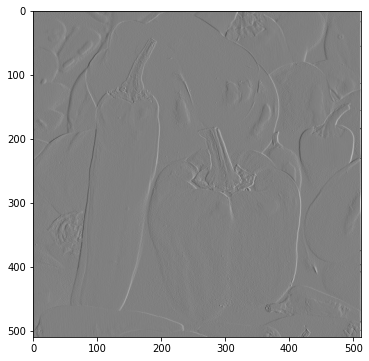

**************************************************
## [RESULT 08]
**************************************************


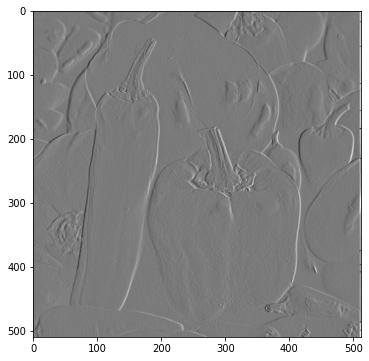

**************************************************
## [RESULT 09]
**************************************************


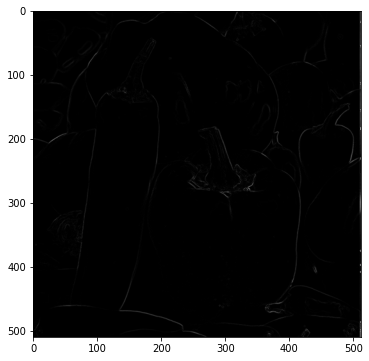

**************************************************
## [RESULT 10]
**************************************************


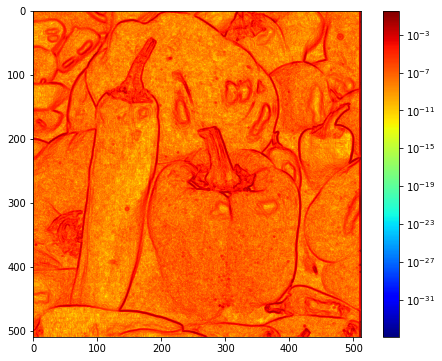

**************************************************
## [RESULT 11]
**************************************************
value1 =  -0.007843137254902044
value2 =  0.0
value3 =  -0.005228758169934622
value4 =  0.011764705882352955
**************************************************
## [RESULT 12]
**************************************************
value1 =  0.0
value2 =  -0.0026143790849673205
value3 =  -0.01568627450980392
value4 =  0.01307189542483661
**************************************************
## [RESULT 13]
**************************************************
value1 =  0.003921568627451022
value2 =  -0.0013071895424836603
value3 =  -0.00522875816993465
value4 =  0.0006535947712418277
**************************************************
## [RESULT 14]
**************************************************
value1 =  -0.03529411764705892
value2 =  0.0
value3 =  -0.01699346405228752
value4 =  -5.551115123125783e-17
**************************************************
## [RESULT 15]
*************

In [701]:
number_result = 17

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)